## Importing Libraries & Dataset



In [44]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [45]:
print(tf.__version__)

2.11.0


In [46]:
df=tf.keras.datasets.mnist

In [47]:
df

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [48]:
(X_train, y_train), (X_test, y_test) = df.load_data()

In [49]:
class_names = [0,1,2,3,4,5,6,7,8,9]

## Exploring data

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [52]:
X_test.shape

(10000, 28, 28)

## Pre-processing data

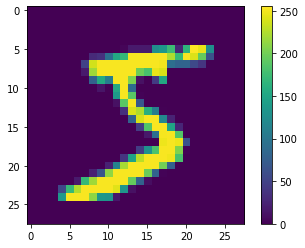

In [53]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We divide X_train by 255 because pixel value ranges from 0-256 and apart from zero, the range is 255.

This is done for scaling.

In [54]:
X_train = X_train / 255.0
X_test = X_test / 255.0

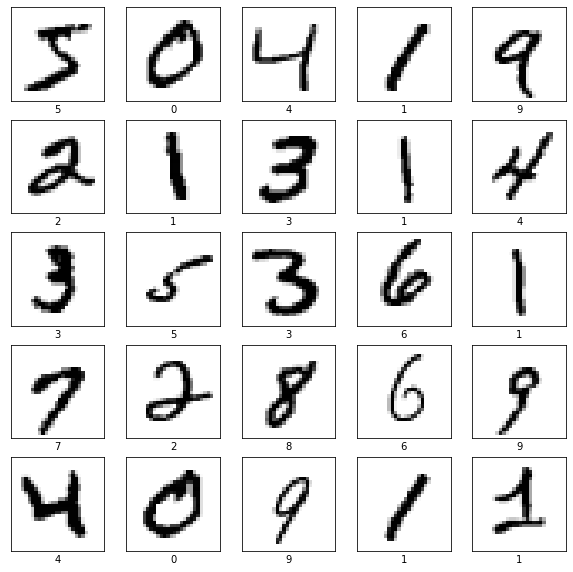

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Building the model

### Setting up the layers

With 2 hidden layers (Relu and LeakyRelu) :

***Test accuracy***: 0.9775000214576721 


With the same 2 hidden layers but different no. of neurons (280, 128) :

***Test accuracy***: 0.9812999963760376


With 3 hidden layers :

***Test accuracy***: 0.9793000221252441




In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(280, activation='relu'),
    tf.keras.layers.Dense(128, activation='LeakyReLU'),    
    tf.keras.layers.Dense(10)
])

Flatten layer converts all the image data to 1-d array

First dense layer generates 128 neurons.

The second dense layer takes input from the first dense layer and converts them into 10 logits

### Compiling the model

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

The logits from the last code are passed through the loss function.

We want to minimize the loss function.

Optimizer updates weights according toh the output from the loss function.

## Training the model

In [58]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1929 - accuracy: 0.9412
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0864 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0624 - accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0483 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0380 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0318 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0241 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss:

## Evaluating Accuracy

In [59]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0915 - accuracy: 0.9793 - 586ms/epoch - 2ms/step

Test accuracy: 0.9793000221252441


## Predicting

In [60]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [61]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


## Checking predictions

In [62]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [63]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

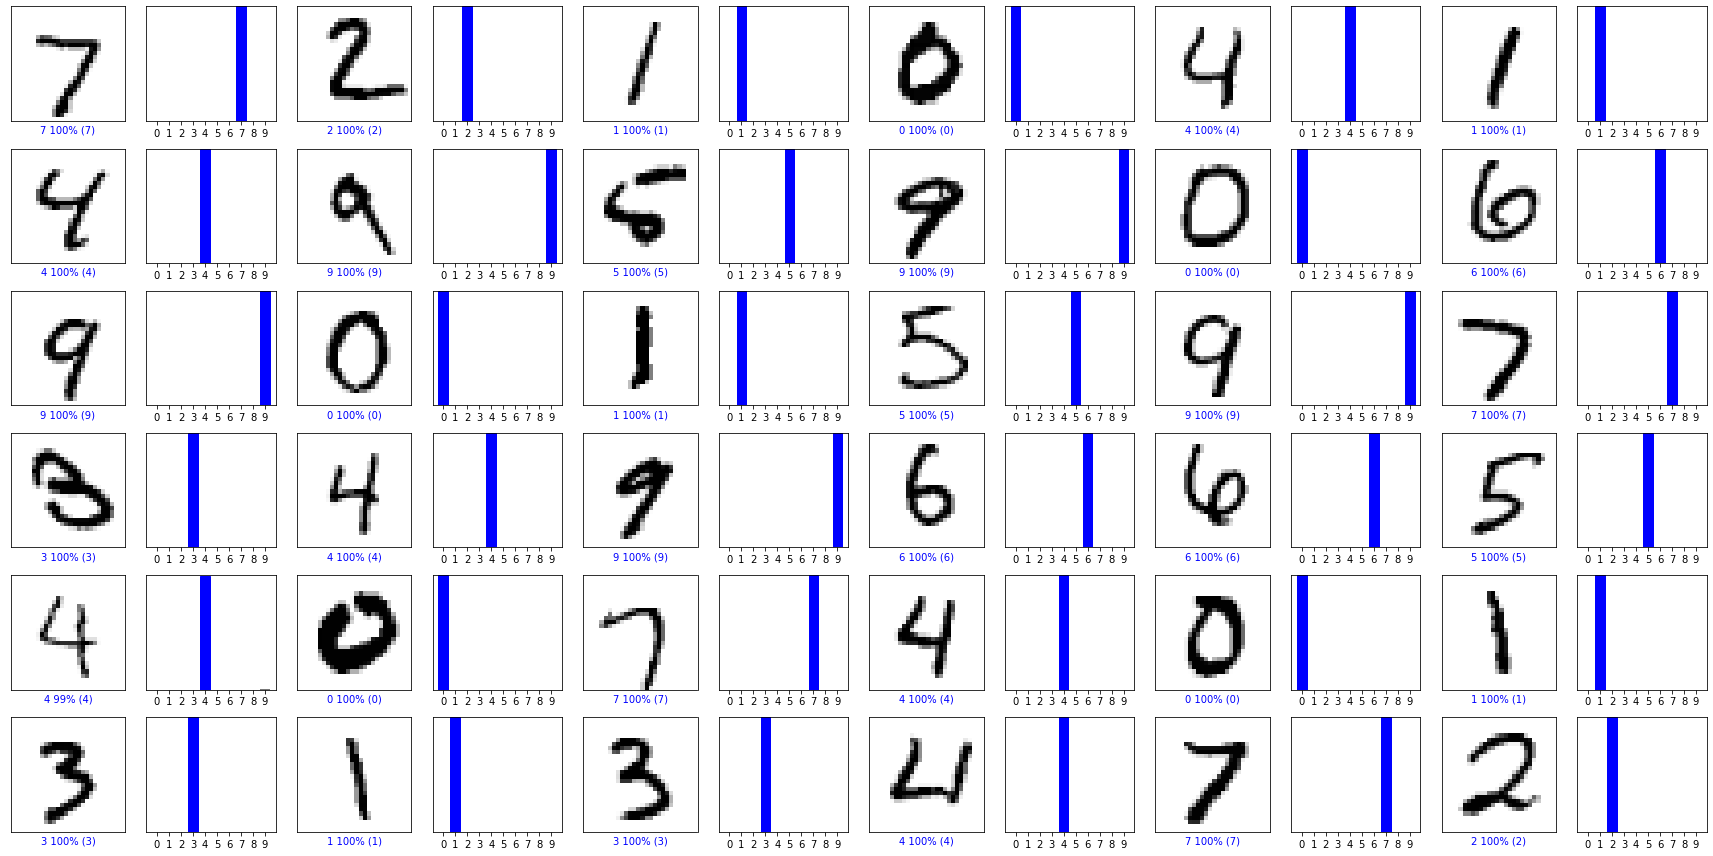

In [65]:
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()